#Student Maths performance dataset
https://www.kaggle.com/datasets/whenamancodes/student-performance

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import datetime

In [6]:
data=pd.read_csv('./Maths.csv')
data.shape

(395, 33)

# EDA

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
data['school'].unique()

array(['GP', 'MS'], dtype=object)

## Calculated field average grades in first, second & final grades

In [12]:
data['avg'] = data[['G1', 'G2','G3']].mean(axis=1)

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [6]:
# to take numeric columns from the list
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
numcols = newdf.columns
print(numcols)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'avg'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>],
       [<AxesSubplot:title={'center':'avg'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

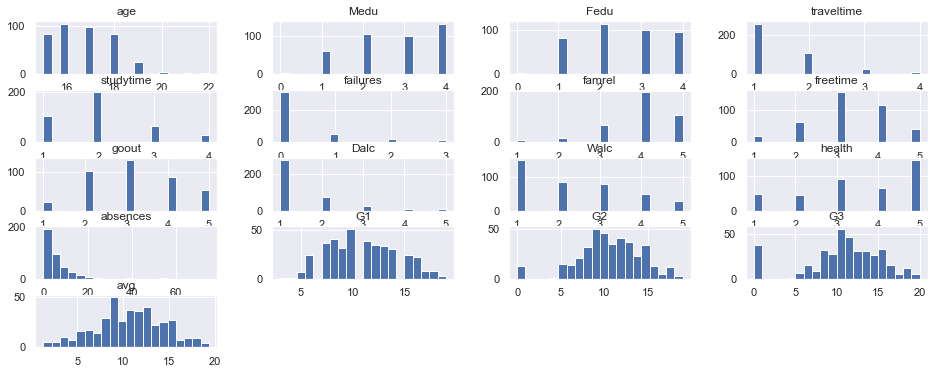

In [15]:
data[[ 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3','avg']].hist(
 bins=20, figsize=(16, 6))

In [107]:
corr = data.corr()
print(corr)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

## Insight 1: Parent's education level is a significant factor in all periodic grades 

In [17]:
print("The correlation coefficient  between G1 and Mothers's Education  is :",np.corrcoef(data['avg'],data['Medu'])[0,1])
print("The correlation coefficient  between G1 and Father's Education  is :",np.corrcoef(data['avg'],data['Fedu'])[0,1])

The correlation coefficient  between G1 and Mothers's Education  is : 0.22425986840612738
The correlation coefficient  between G1 and Father's Education  is : 0.17585213510215628


Text(0, 0.5, 'Avg Period Grades')

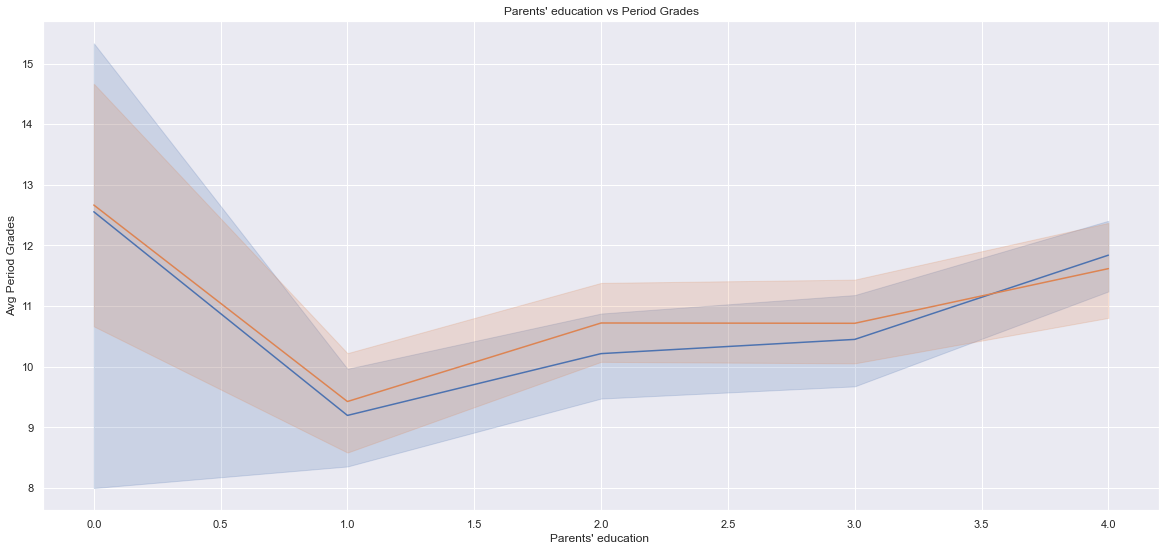

In [69]:
plt.figure(figsize=(20,9))
sns.lineplot(data=data,x='Medu',y='avg')
sns.lineplot(data=data,x='Fedu',y='avg')
plt.title("Parents' education vs Period Grades")
plt.xlabel("Parents' education ")
plt.ylabel("Avg Period Grades")

##  Parents professions (Teachers' father & Health sector mothers' are high score achievers )

Text(0, 0.5, 'Avg Period Grades')

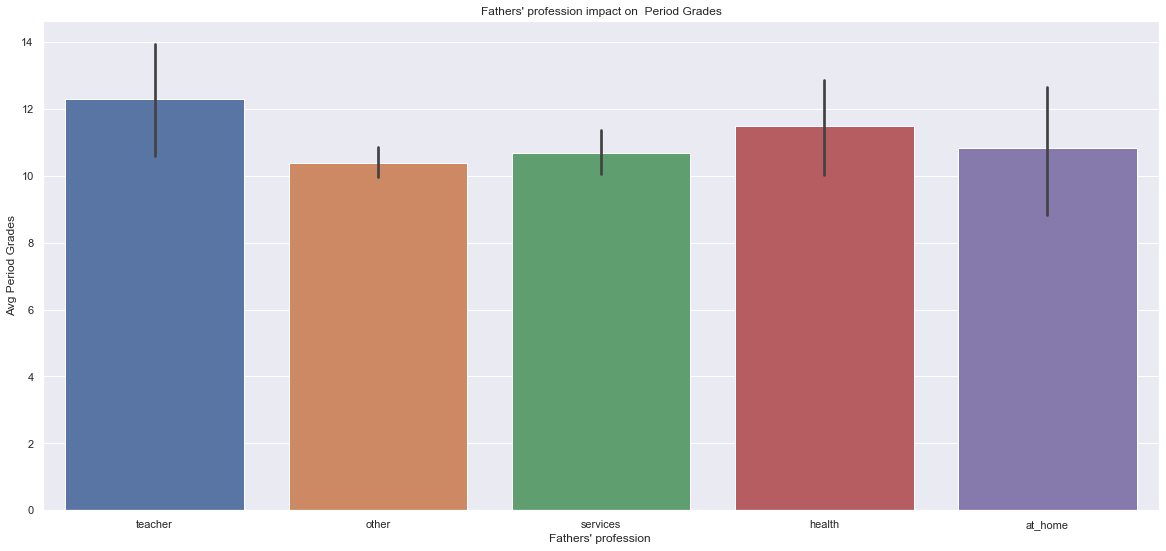

In [60]:
plt.figure(figsize=(20,9))
sns.barplot(data=data,x='Fjob',y='avg')
plt.title("Fathers' profession impact on  Period Grades")
plt.xlabel("Fathers' profession ")
plt.ylabel("Avg Period Grades")

Text(0, 0.5, 'Avg Period Grades')

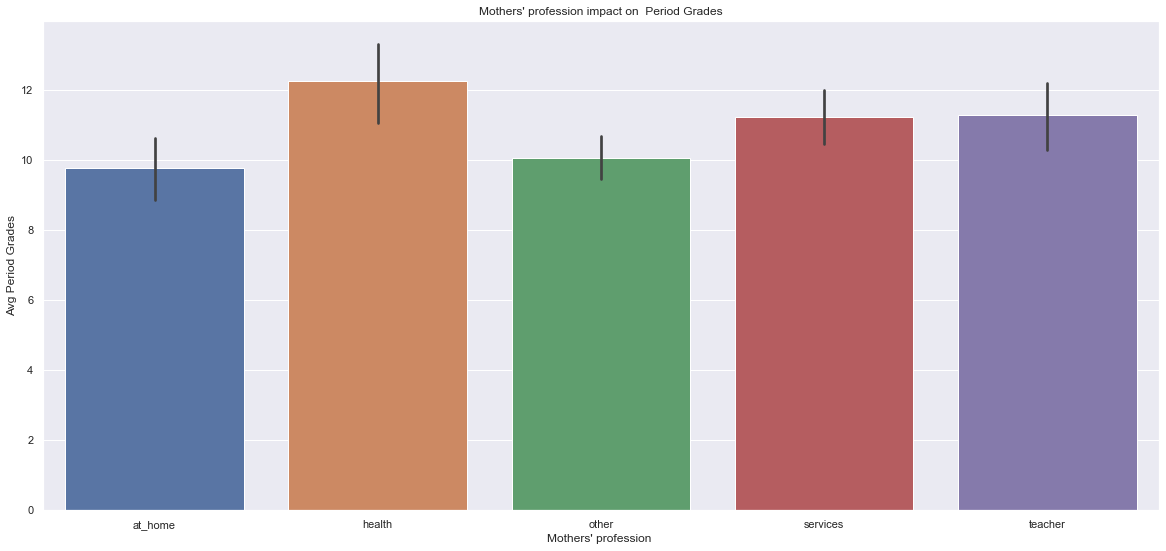

In [61]:
plt.figure(figsize=(20,9))
sns.barplot(data=data,x='Mjob',y='avg')
plt.title("Mothers' profession impact on  Period Grades")
plt.xlabel("Mothers' profession ")
plt.ylabel("Avg Period Grades")

## Insight 2: Past Class failure trauma is a nightmare for performance

Text(0, 0.5, 'Avg Period Grades')

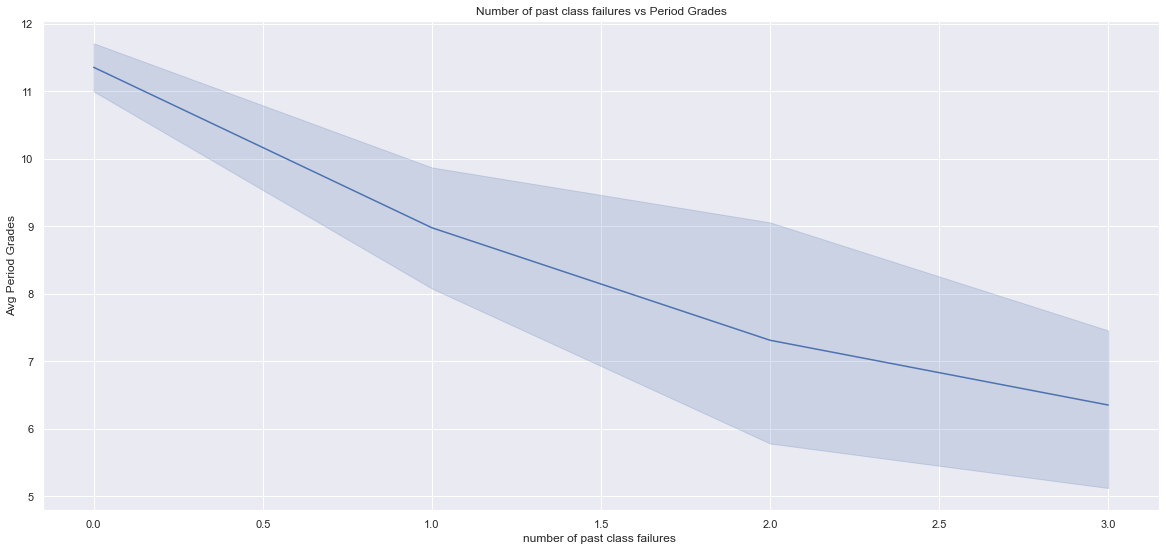

In [26]:
plt.figure(figsize=(20,9))
sns.lineplot(data=data,x='failures',y='avg')
plt.title("Number of past class failures vs Period Grades")
plt.xlabel("number of past class failures ")
plt.ylabel("Avg Period Grades")

##  Insight 3:Chill out with friends at a mild level is positive but access leads towards fatal consequences

Text(0, 0.5, 'Avg Period Grades')

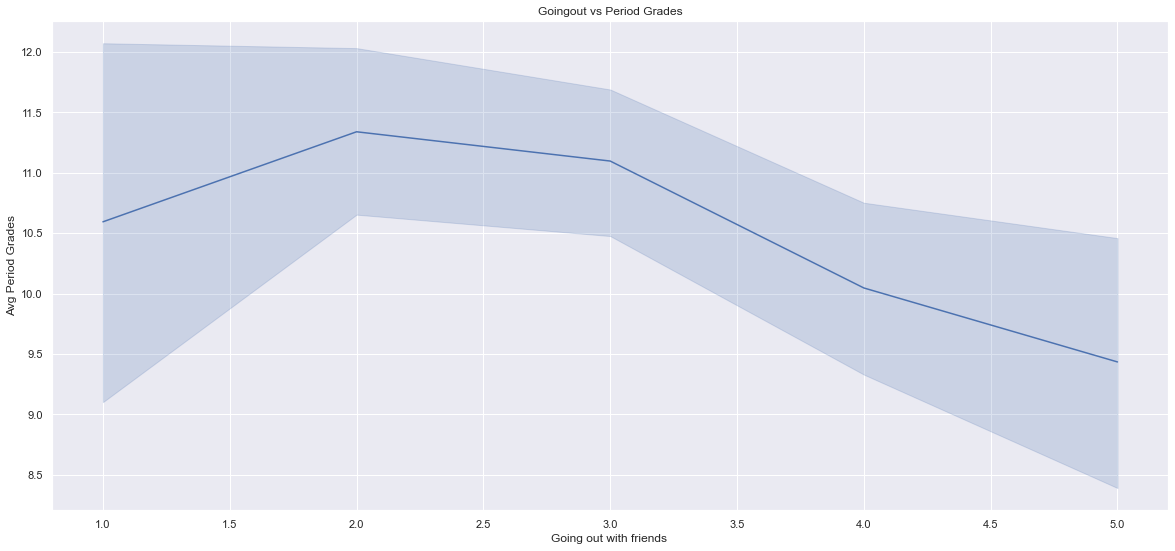

In [27]:
plt.figure(figsize=(20,9))
sns.lineplot(data=data,x='goout',y='avg')
plt.title("Goingout vs Period Grades")
plt.xlabel("Going out with friends ")
plt.ylabel("Avg Period Grades")

# Insight 4: Age 20 are the top achievers in all 

Text(0, 0.5, 'Age')

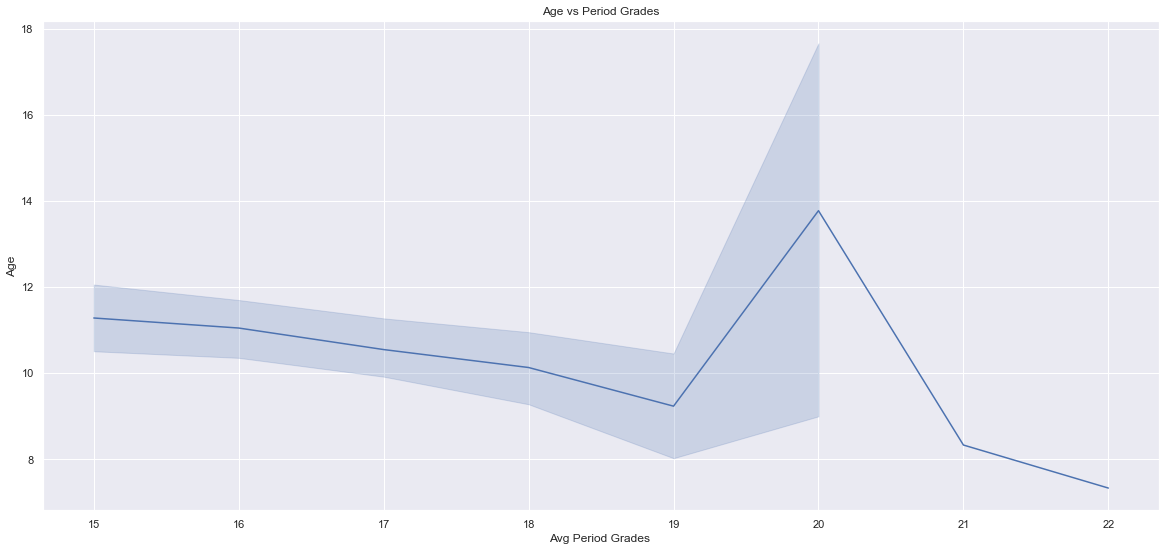

In [25]:
plt.figure(figsize=(20,9))
sns.lineplot(data=data,x='age',y='avg')
plt.title("Age vs Period Grades")
plt.xlabel("Avg Period Grades ")
plt.ylabel("Age")

# Insight 5: Male vs femal performance

Text(0, 0.5, 'Avg Period Grades')

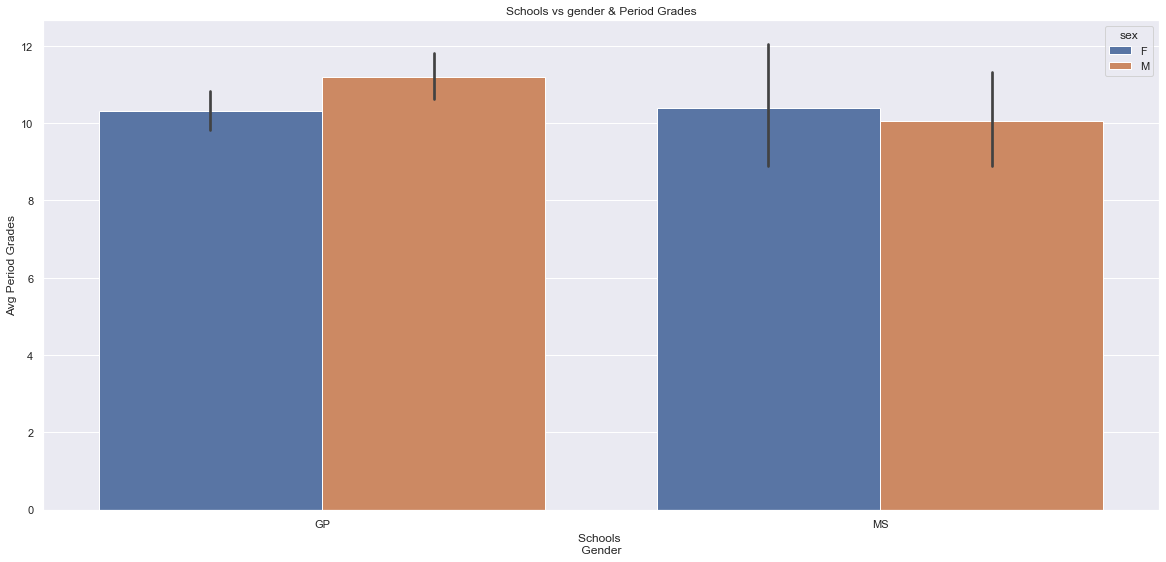

In [29]:
plt.figure(figsize=(20,9))
sns.barplot(data=data,x='school',y='avg',hue='sex')
plt.title("Schools by gender & Period Grades")
plt.xlabel("Schools \n Gender ")
plt.ylabel("Avg Period Grades")

## Precisely females of 20 years age are more productive

Text(0, 0.5, 'Avg Period Grades')

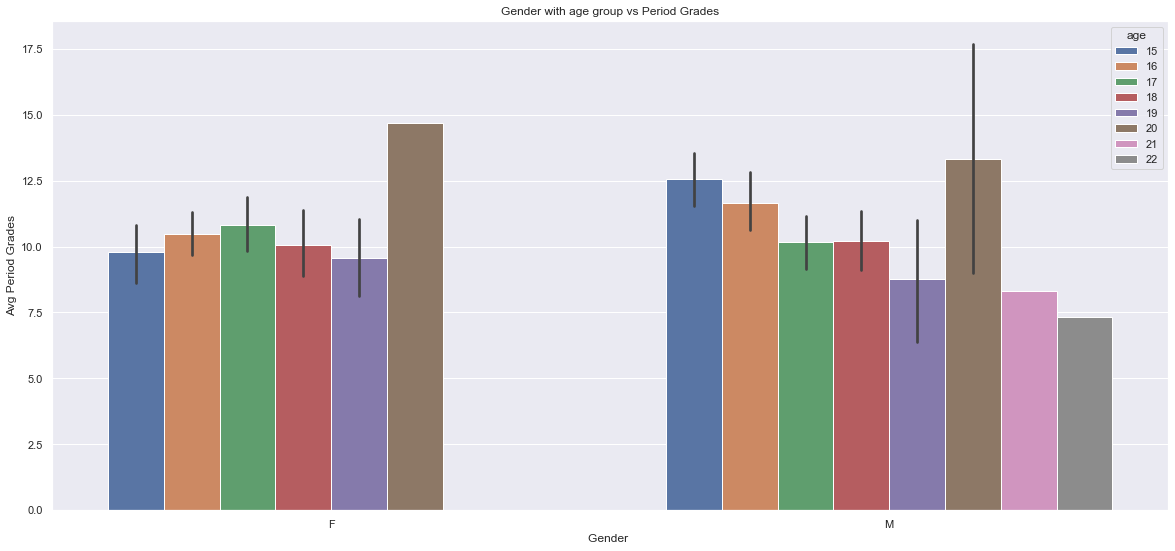

In [24]:
plt.figure(figsize=(20,9))
sns.barplot(data=data,x='sex',y='avg',hue="age")
plt.title("Gender with age group vs Period Grades")
plt.xlabel("Gender ")
plt.ylabel("Avg Period Grades")

## Insight 6: Urban area students are generally performing better

Text(0, 0.5, 'Avg Period Grades')

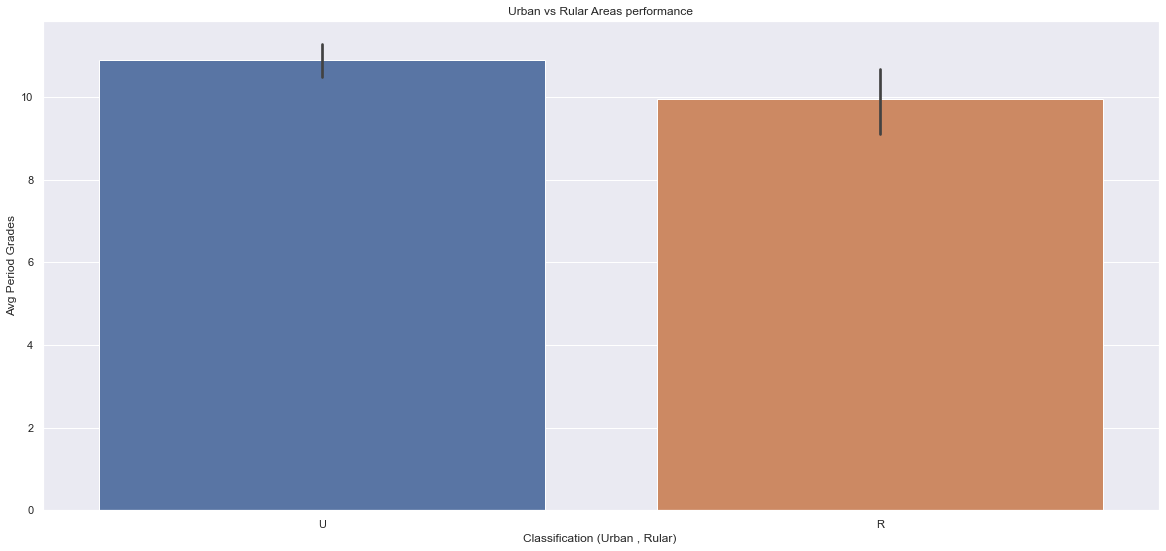

In [52]:
plt.figure(figsize=(20,9))
sns.barplot(data=data,x='address',y='avg')
plt.title("Urban vs Rular Areas performance")
plt.xlabel("Classification (Urban , Rular) ")
plt.ylabel("Avg Period Grades")